<b> IMPLEMENTATION OF A GEOMETRIC BROWNIAN MOTION</b>

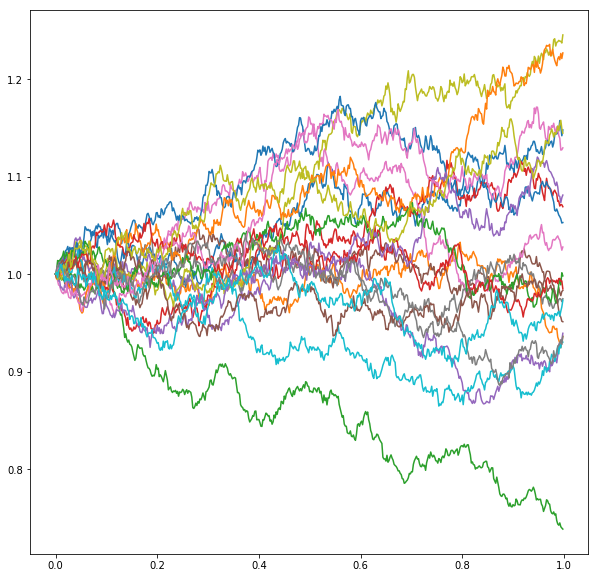

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

num_sims = 20 ### display 20 runs

t_init = 0
t_end  = 1
N      = 500 ### Compute 500 grid points
dt     = float(t_end - t_init) / N 
y_init = 1

#b = 0.7
c_mu    = 0.01
c_sigma = 0.1

def mu(y, t): 
    """Implement the constant mu.""" ## = \mu*Y_t
    return c_mu*y

def sigma(y, t): 
    """Implement the constan sigma.""" ## = \sigma*Y_t
    return c_sigma*y
    
def dW(delta_t): 
    """Sample a random number at each call."""
    return np.random.normal(loc = 0.0, scale = np.sqrt(delta_t))

def simulation(average = False):
    ts    = np.arange(t_init, t_end, dt)
    ys    = np.zeros(N)
    yaverage = np.zeros(N)
    plt.figure(figsize=(10,10))
    
    ys[0] = y_init
    
    for _ in range(num_sims):
        for i in range(1, ts.size):
            t = (i-1) * dt
            y = ys[i-1]
            ys[i] = y + mu(y, t) * dt + sigma(y, t) * dW(dt)
        if average:
            yaverage += ys
            plt.plot(ts, ys,'g--', linewidth=0.5)
        else:
            plt.plot(ts, ys)

    if average:
        yaverage /= num_sims
        plt.plot(ts, yaverage, 'b', linewidth=3.0)
        print("The final value of average is ", yaverage[ts.size-1])
    plt.show()

simulation()

The final value of average is  1.01245789756


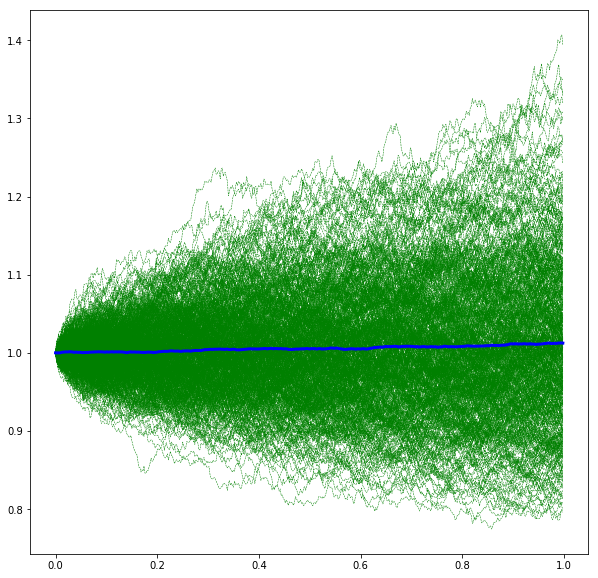

In [23]:
num_sims = 500 ### display 500 runs
c_mu    = 0.01
c_sigma = 0.1
simulation(average = True)

The final value of average is  1.10491772741


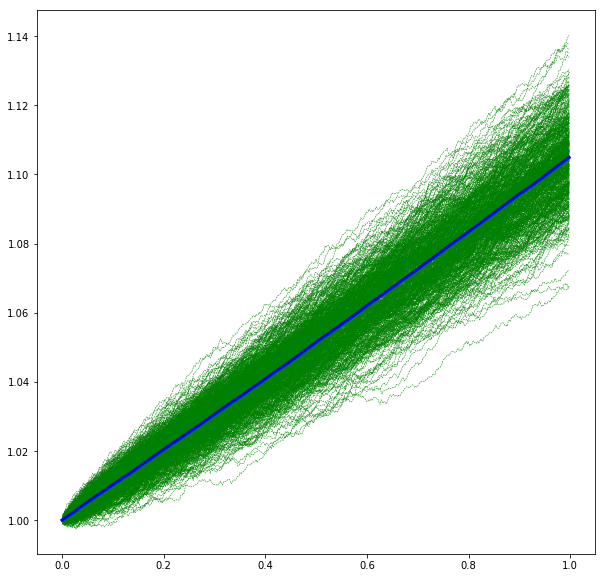

In [24]:
c_mu    = 0.1
c_sigma = 0.01
num_sims = 500

simulation(average = True)

<b> Application of GBM to calculate the Interest Rate </b>

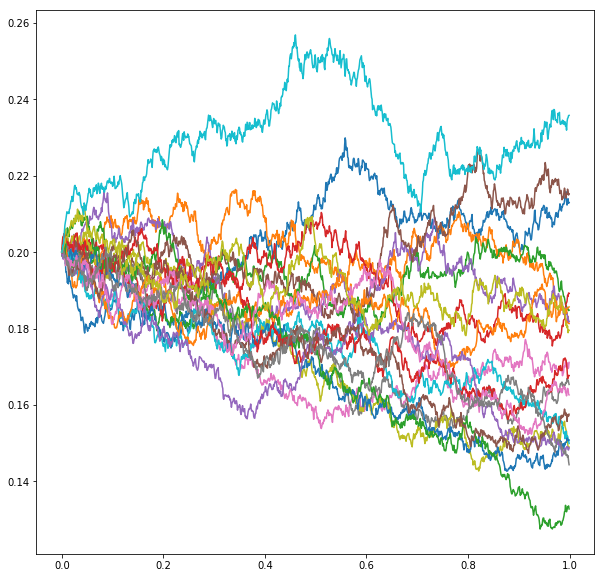

In [25]:
b = 0.1
a = 0.4
c = 0.15

def mu(y, t): 
    """Implement the given mu.""" ## = a*(b - Y_t)
    return a*(b-y)

def sigma(y, t): 
    """Implement the constant volatility.""" ## = \sigma*Y_t
    return c*y

t_init = 0
t_end  = 1 # At the end of one year
N      = 1000 ### Compute 1000 points
dt     = float(t_end - t_init) / N 
y_init = 0.2 #Initial rate of 20%

num_sims = 20

simulation(average = False)

The final value of average is  0.16677225106


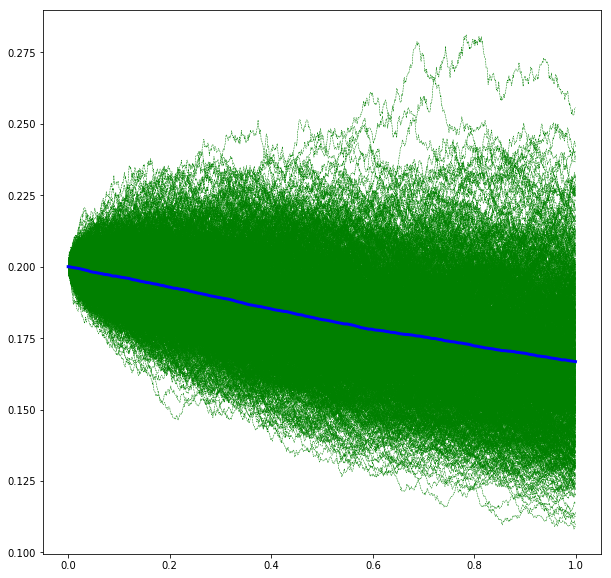

In [26]:
num_sims = 1000
simulation(average = True)